In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [3]:
# read the CSV file
data = pd.read_csv('C:/creditcard/Credit_Card.csv')

# Display the first 5 rows of the dataset
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Display information about the dataset's structure and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# Check for missing values in each column and sum them up
missing_values = data.isnull().sum()
missing_values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
# Descriptive statistics
data.describe(include='all') 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# Convert selected columns to categorical data type
data['SEX'] = data['SEX'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['MARRIAGE'] = data['MARRIAGE'].astype('category')
data['default.payment.next.month'] = data['default.payment.next.month'].astype('category')


In [68]:
data['SEX'].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

In [9]:
# Display the count of unique values in the 'SEX' column
print(data['SEX'].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64


In [10]:
# Display the count of unique values in the 'MARRIAGE' column
print(data['MARRIAGE'].value_counts())

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [11]:
# Display the count of unique values in the 'EDUCATION' column
print(data['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


In [18]:
# Replace values in 'MARRIAGE' column where value is 0 with 3
data.loc[data['MARRIAGE'] == 0, 'MARRIAGE'] = 3

# Replace values in 'EDUCATION' column where value is in [0, 5, 6] with 5
data['EDUCATION'] = data['EDUCATION'].apply(lambda x: 5 if x in [0, 5, 6] else x)



In [19]:
# Display the count of unique values in the 'MARRIAGE' column after replacements
print(data['MARRIAGE'].value_counts())

# Display the count of unique values in the 'EDUCATION' column after replacements
print(data['EDUCATION'].value_counts())

MARRIAGE
2    15964
1    13659
3      377
0        0
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      345
4      123
Name: count, dtype: int64


In [20]:
# Create a new column 'target' and assign values from 'default.payment.next.month'
data['target'] = data['default.payment.next.month']

# Drop the column 'default.payment.next.month' from the DataFrame
data.drop('default.payment.next.month', axis=1, inplace=True)


In [21]:
# Display the count of unique values in the 'target'
print(data['target'].value_counts())

target
0    23364
1     6636
Name: count, dtype: int64


In [22]:
# Create a new DataFrame 'data_ones' with rows where 'target' is 1
data_ones = data[data['target'] == 1]

# Create a new DataFrame 'data_zeros' with rows where 'target' is 0
data_zeros = data[data['target'] == 0]

# Randomly sample indices from 'data_ones' to select 6000 rows without replacement
d1 = np.sort(np.random.choice(data_ones.shape[0], size=6000, replace=False))

# Randomly sample indices from 'data_zeros' to select 6000 rows without replacement
d2 = np.sort(np.random.choice(data_zeros.shape[0], size=6000, replace=False))

# Concatenate selected rows from 'data_ones' and 'data_zeros' to create 'dat2'
dat2 = pd.concat([data_ones.iloc[d1], data_zeros.iloc[d2]], axis=0)


In [23]:
# Display the count of unique values in the 'target' in the balanced data
print(dat2['target'].value_counts())

target
0    6000
1    6000
Name: count, dtype: int64


In [24]:
# Separate features (X) and target (y) from the 'dat2' DataFrame
X = dat2.drop('target', axis=1)
y = dat2['target']

# Split the data into training and testing sets (test_size = 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1989)

col_0  count
SEX         
1       3444
2       4956


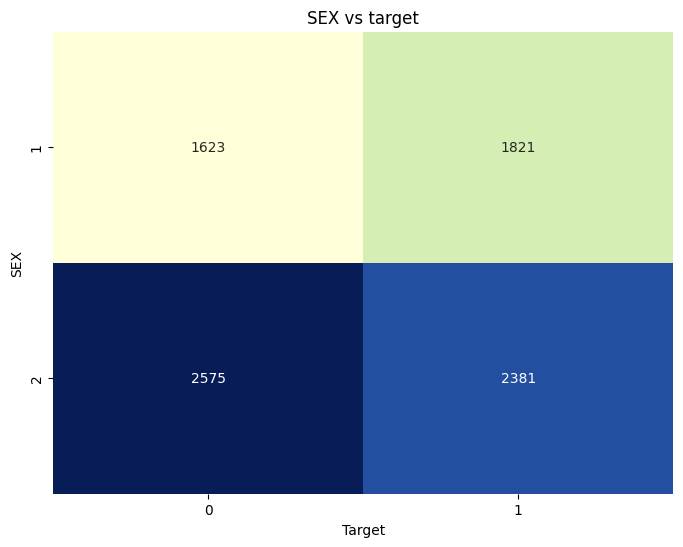

In [26]:
# Display gender distribution using a table
sex_table = pd.crosstab(index=X_train["SEX"], columns="count")
print(sex_table)

# Show the relationship between gender and the target variable using a mosaic plot
mosaic_data = pd.DataFrame({"SEX": X_train["SEX"], "target": y_train})
mosaic_table = pd.crosstab(index=mosaic_data["SEX"], columns=mosaic_data["target"])
plt.figure(figsize=(8, 6))
sns.heatmap(mosaic_table, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("SEX vs target")
plt.xlabel("Target")
plt.ylabel("SEX")
plt.show()

col_0      count
EDUCATION       
1           2768
2           4084
3           1460
4             29
5             59


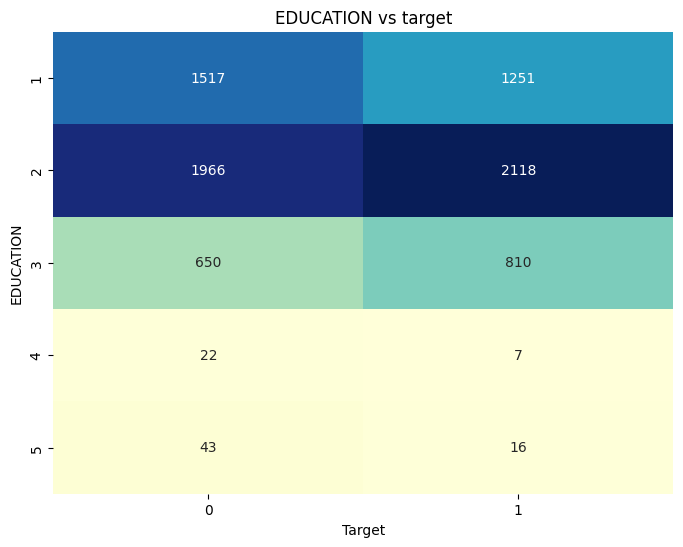

In [27]:
# Display education level distribution using a table
education_table = pd.crosstab(index=X_train["EDUCATION"], columns="count")
print(education_table)

# Show the relationship between education level and the target variable using a mosaic plot
mosaic_data = pd.DataFrame({"EDUCATION": X_train["EDUCATION"], "target": y_train})
mosaic_table = pd.crosstab(index=mosaic_data["EDUCATION"], columns=mosaic_data["target"])
plt.figure(figsize=(8, 6))
sns.heatmap(mosaic_table, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("EDUCATION vs target")
plt.xlabel("Target")
plt.ylabel("EDUCATION")
plt.show()

col_0     count
MARRIAGE       
1          3841
2          4441
3           118


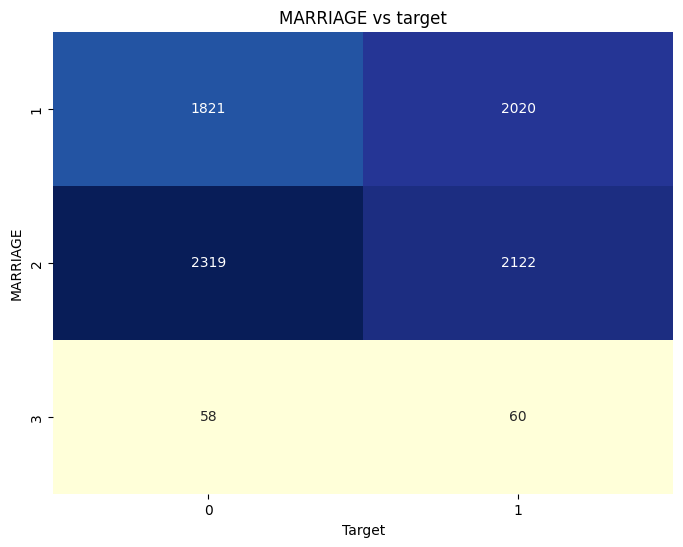

In [28]:
# Display education level distribution using a table
education_table = pd.crosstab(index=X_train["MARRIAGE"], columns="count")
print(education_table)

# Show the relationship between marriage and the target variable using a mosaic plot
mosaic_data = pd.DataFrame({"MARRIAGE": X_train["MARRIAGE"], "target": y_train})
mosaic_table = pd.crosstab(index=mosaic_data["MARRIAGE"], columns=mosaic_data["target"])
plt.figure(figsize=(8, 6))
sns.heatmap(mosaic_table, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("MARRIAGE vs target")
plt.xlabel("Target")
plt.ylabel("MARRIAGE")
plt.show()

count    8400.000000
mean       35.514524
std         9.411282
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        73.000000
Name: AGE, dtype: float64


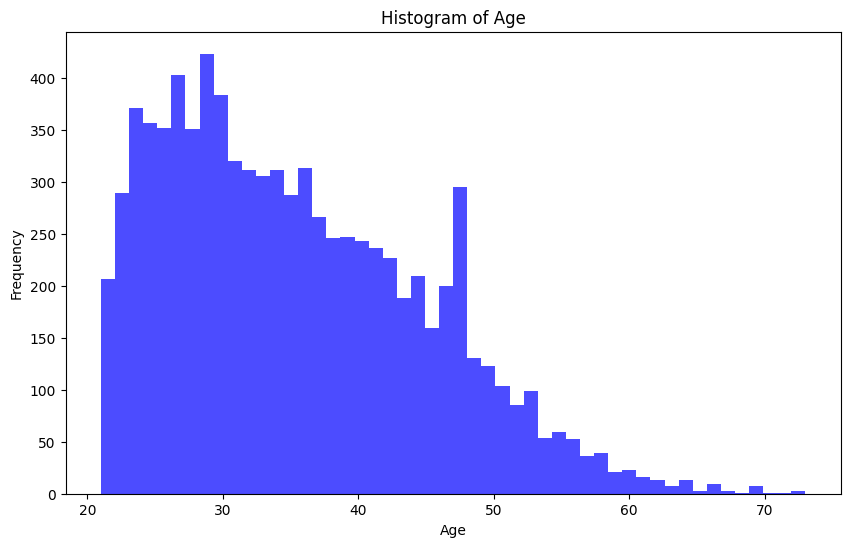

In [31]:
# Summarize age distribution
print(X_train["AGE"].describe())

# Plotting the age histogram
plt.figure(figsize=(10, 6))
plt.hist(X_train["AGE"], bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


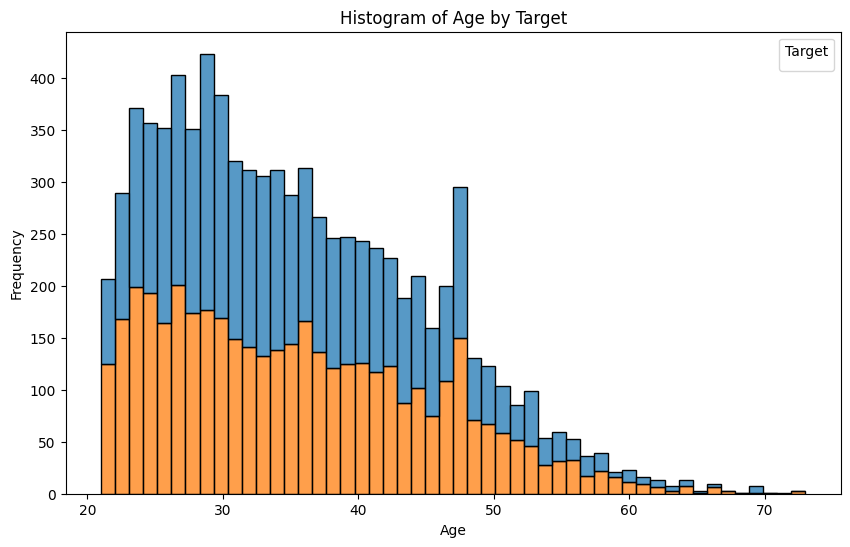

In [33]:
# Plotting the age histogram colored by target variable groups
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x="AGE", hue=y_train, multiple="stack", bins=50)
plt.title("Histogram of Age by Target")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Target")
plt.show()

In [60]:
from sklearn.metrics import classification_report

# Create a Logistic Regression model for fit2
model_fit1 = LogisticRegression()
model_fit1.fit(X_train[['PAY_0', 'PAY_2', 'PAY_3']], y_train)

# Predict using the model
fit1_predictions = model_fit1.predict(X_test[['PAY_0', 'PAY_2', 'PAY_3']])

# Print classification report for fit1
print("Fit1 Classification Report:")
print(classification_report(fit1_predictions, y_test))

# Calculate and print additional evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(fit1_predictions, y_test)
precision = precision_score(fit1_predictions, y_test)
recall = recall_score(fit1_predictions, y_test)
f1 = f1_score(fit1_predictions, y_test)

confusion_matrix(fit1_predictions, y_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Fit1 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73      2257
           1       0.57      0.77      0.66      1343

    accuracy                           0.70      3600
   macro avg       0.70      0.71      0.69      3600
weighted avg       0.73      0.70      0.70      3600

Accuracy: 0.70
Precision: 0.57
Recall: 0.77
F1-score: 0.66


In [61]:
# Create a Logistic Regression model for fit2
model_fit2 = LogisticRegression()
model_fit2.fit(X_train[['MARRIAGE', 'SEX', 'PAY_4']], y_train)

# Predict using the model
fit2_predictions = model_fit2.predict(X_test[['MARRIAGE', 'SEX', 'PAY_4']])

# Print classification report for fit2
print("Fit2 Classification Report:")
print(classification_report(fit2_predictions, y_test))

# Calculate and print additional evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(fit2_predictions, y_test)
precision = precision_score(fit2_predictions, y_test)
recall = recall_score(fit2_predictions, y_test)
f1 = f1_score(fit2_predictions, y_test)

confusion_matrix(fit2_predictions, y_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Fit2 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      2939
           1       0.30      0.81      0.44       661

    accuracy                           0.61      3600
   macro avg       0.61      0.69      0.57      3600
weighted avg       0.81      0.61      0.66      3600

Accuracy: 0.61
Precision: 0.30
Recall: 0.81
F1-score: 0.44


In [67]:
# Create a Logistic Regression model for fit3
model_fit3 = LogisticRegression()
model_fit3.fit(X_train[['LIMIT_BAL', 'BILL_AMT1']], y_train)

# Predict using the model
fit3_predictions = model_fit3.predict(X_test[['LIMIT_BAL','BILL_AMT1']])

# Print classification report for fit2
print("Fit2 Classification Report:")
print(classification_report(fit3_predictions, y_test))

# Calculate and print additional evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(fit3_predictions, y_test)
precision = precision_score(fit3_predictions, y_test)
recall = recall_score(fit3_predictions, y_test)
f1 = f1_score(fit3_predictions, y_test)

confusion_matrix(fit3_predictions, y_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Fit2 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.52      0.64      2890
           1       0.22      0.57      0.32       710

    accuracy                           0.53      3600
   macro avg       0.53      0.54      0.48      3600
weighted avg       0.71      0.53      0.57      3600

Accuracy: 0.53
Precision: 0.22
Recall: 0.57
F1-score: 0.32
